In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## XOR Problem

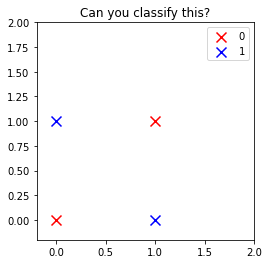

In [2]:
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

label = np.array([0, 1, 1, 0])

cdict = {0: 'red', 1: 'blue'}
for g in [0, 1]:
    idx = np.nonzero(label == g)
    plt.scatter(x[idx,0], x[idx,1], marker='x', c = cdict[g], label = g, s = 100)

plt.axis('scaled')
plt.xlim(-0.2,2)
plt.ylim(-0.2,2)
plt.legend()
plt.title('Can you classify this?')
plt.show()

## Using Logistic Regression

In [3]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1.0)

X = torch.Tensor(x)
y = torch.Tensor(label).unsqueeze(1)

print('Start Training...')
for epoch in range(1, 1001):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(f'epoch {epoch}   loss:{loss.item():.3f}')

acc = ((y_pred >= 0.5) == y).sum() / len(X)
print(f'Finished Training... final accuracy : {acc:.3f}')

Start Training...
epoch 100   loss:0.693
epoch 200   loss:0.693
epoch 300   loss:0.693
epoch 400   loss:0.693
epoch 500   loss:0.693
epoch 600   loss:0.693
epoch 700   loss:0.693
epoch 800   loss:0.693
epoch 900   loss:0.693
epoch 1000   loss:0.693
Finished Training... final accuracy : 0.500


## Using MultiLayer

In [4]:
model = nn.Sequential(nn.Linear(2,10), nn.Sigmoid(), nn.Linear(10,1), nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=10.0)

X = torch.Tensor(x)
y = torch.Tensor(label).unsqueeze(1)

print('Start Training...')
for epoch in range(1, 1001):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        print(f'epoch {epoch}   loss:{loss.item():.3f}')

acc = ((y_pred >= 0.5) == y).sum() / len(X)
print(f'Finished Training... final accuracy : {acc:.3f}')

Start Training...
epoch 100   loss:0.038
epoch 200   loss:0.008
epoch 300   loss:0.004
epoch 400   loss:0.003
epoch 500   loss:0.002
epoch 600   loss:0.002
epoch 700   loss:0.002
epoch 800   loss:0.001
epoch 900   loss:0.001
epoch 1000   loss:0.001
Finished Training... final accuracy : 1.000
